In [1]:
%run ../macro_tQ.py
import sys
sys.path.append('../')
import macro_tQ as tQ

In [2]:
from qiskit.circuit.library import ZGate
from qiskit import QuantumRegister, ClassicalRegister,QuantumCircuit

def R0(n):    
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    qc.x(n-1)
    qc.append(ZGate().control(n-1,ctrl_state= 0),qr)
    qc.x(n-1)
    qcR0 =  qc.to_gate()
    qcR0.name = 'R0'
    return qcR0

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


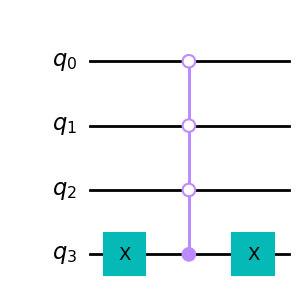

In [3]:
R0(4).definition.draw('mpl')

In [4]:
def Rw(n,w):        
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    wstring = format(int(w), 'b').zfill(n)
    for i,wi in enumerate(reversed(wstring)):
        if wi == '1':
            qc.x(qr[i])
    qc.append(R0(n),qr)        
#    qc.append(ZGate().control(n-1,ctrl_state= 0),qr) # el reflector R0
    for i,wi in enumerate(reversed(wstring)):
        if wi == '1':
            qc.x(qr[i])
    qcRw =  qc.to_gate()
    qcRw.name='Rw'
    return qcRw


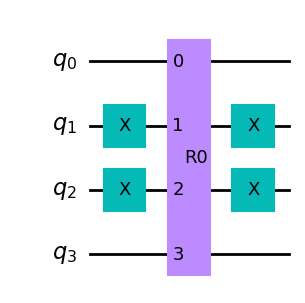

In [5]:
# Sobre un circuito de 4 cúbits, sea el estado w = 6 = 0110 

Rw(4,6).definition.draw('mpl')

In [6]:
def Rs(n):        
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    qc.h(qr)
    qc.append(R0(n),qr)
    qc.h(qr)
    qcRs = qc.to_gate()
    qcRs.name='Rs'
    return qcRs


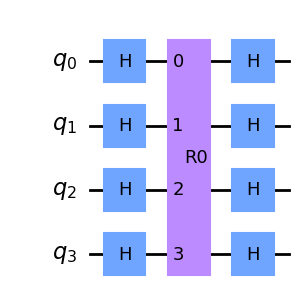

In [7]:
Rs(4).definition.draw('mpl')

In [8]:

def G(n,w):                    
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 

    qc.append(Rw(n,w),qr)
    qc.append(Rs(n),qr)
    
    qcG=qc.to_gate()
    qcG.name='-G'
    return qcG


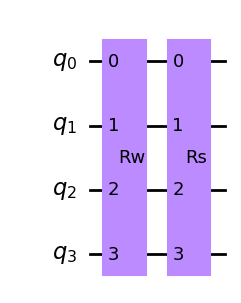

In [9]:
G(4,6).definition.draw('mpl')

0110


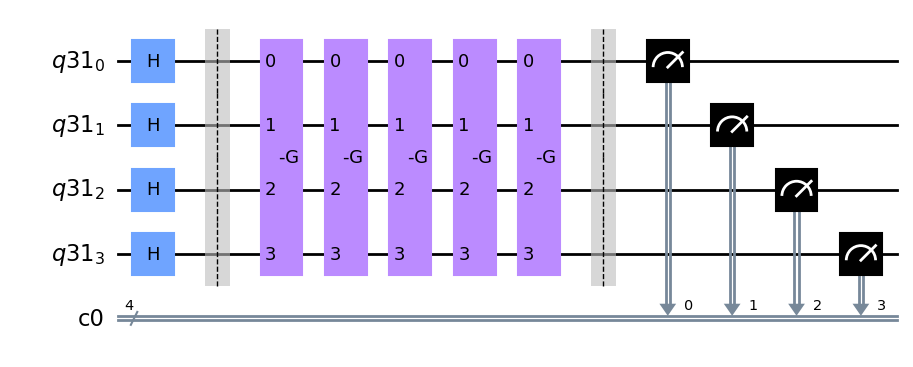

In [10]:
# el número de cúbits de la base de datos
n=4
# el número de iteraciones de Grover
it = 5
# la solución oculta en decimal y en binario
w = 6
wstring = format(int(w), 'b').zfill(n)
print(wstring)

# el circuito de Grover
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qcGrover = QuantumCircuit(qr,cr)
qcGrover.h(qr)
qcGrover.barrier()

for i in range(it):
    qcGrover.append(G(n,w),qr)

qcGrover.barrier()

# medimos el resultado
qcGrover.measure(qr,cr)
qcGrover.draw('mpl')

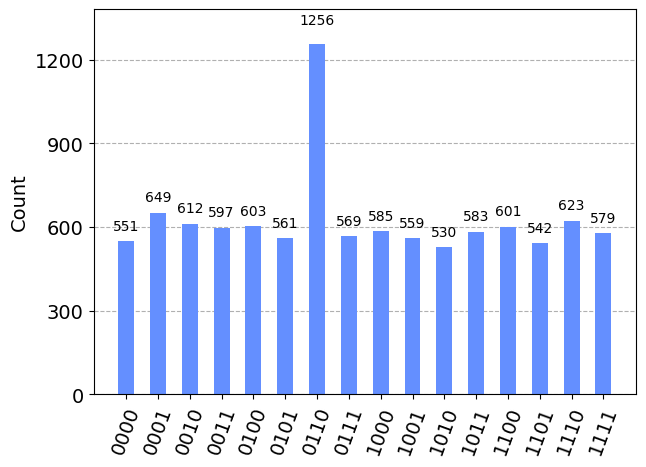

In [11]:
from qiskit import Aer, execute
M_simulator = Aer.get_backend('qasm_simulator')

shots = 10000

# Ejecutamos la simulación y recogemos el número de cuentas de cada estado
cuentas = execute(qcGrover,backend=M_simulator, shots=shots).result().get_counts()


# Calculamos la probabilidad de medir w
#prob_w = cuentas[wstring]/shots
#print(r'La probabilidad de medir w=%s es %f' % (w, prob_w))

# Histogramamos las probabilidades
from qiskit.visualization import plot_histogram
plot_histogram(cuentas)

In [12]:
def Rw(n,w_array): #w_array es una lista de enteros w_i en S_n  
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    
    for w in w_array:
        wstring = format(int(w), 'b').zfill(n)
        for i,wi in enumerate(reversed(wstring)):
            if wi == '1':
                qc.x(qr[i])
        qc.append(R0(n),qr)        
        for i,wi in enumerate(reversed(wstring)):
            if wi == '1':
                qc.x(qr[i])
    qcRw =  qc.to_gate()
    qcRw.name='Rw'
    return qcRw


In [13]:
# dimensión de la base de datos
n=4
# lista de soluciones ocultas
w_array = [1, 3, 6, 7, 15]

# valor de k óptimo
k_op = int(np.pi/(4*np.arcsin(np.sqrt(len(w_array)/2**n))))
print('k_op =',k_op)

k_op = 1


w_i = ['0001', '0011', '0110', '0111', '1111']


/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


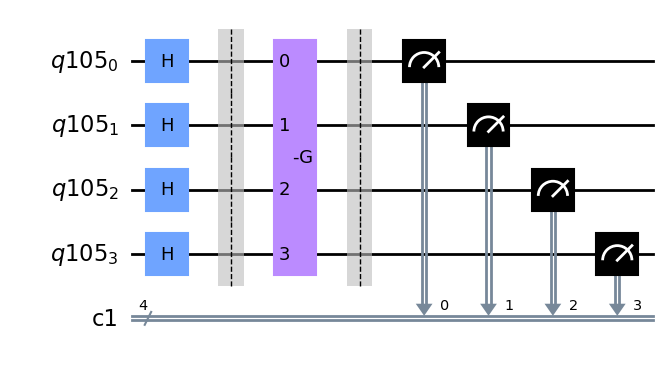

In [14]:
# pasamos las soluciones a cadenas binarias de n entradas
wstring = [format(int(w), 'b').zfill(n) for w in w_array]
print('w_i =',wstring)

qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qcGrover = QuantumCircuit(qr,cr)
qcGrover.h(qr)
qcGrover.barrier()

for i in range(k_op):
    qcGrover.append(G(n,w_array),qr)

qcGrover.barrier()

qcGrover.measure(qr,cr)
qcGrover.draw('mpl')

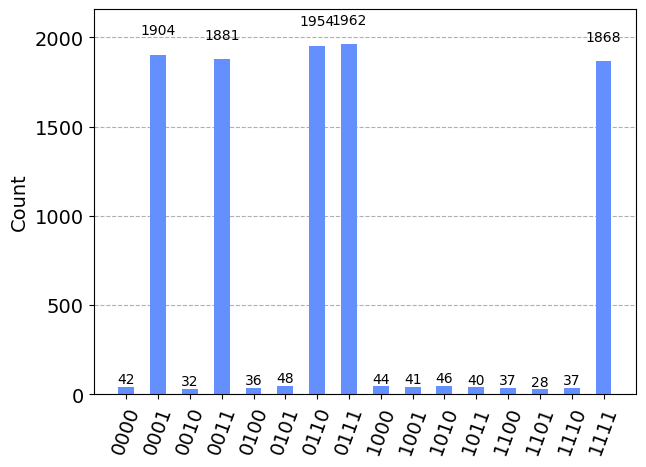

In [15]:
from qiskit import Aer, execute
M_simulator = Aer.get_backend('qasm_simulator')

shots = 10000
# Ejecutamos la simulación y recogemos el número de cuentas de cada estado
counts = execute(qcGrover,backend=M_simulator, shots=shots).result().get_counts()

# Calculamos la probabilidad de medir w
#prob_w = cuentas[wstring]/shots
#print(r'La probabilidad de medir w=%s es %f' % (w, prob_w))

# Histogramamos las probabilidades
from qiskit.visualization import plot_histogram
plot_histogram(counts)

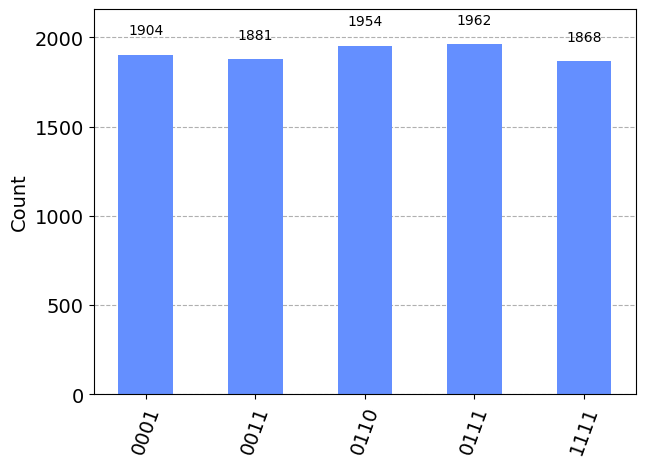

In [16]:
majority_counts = {k: v for k, v in counts.items() if  v>300 }
#print(projected_counts)
plot_histogram(majority_counts)

In [17]:
wi_list = sorted([int(keys,2) for  keys in majority_counts]) 
print('{Ns} ~ ', wi_list)



{Ns} ~  [1, 3, 6, 7, 15]


In [18]:
def c_G(n,w_array,power): 
    qrG = QuantumRegister(n)
    qcG = QuantumCircuit(qrG) 

    for _ in range(power):
        qcG.append(G(n,w_array),qrG)
    
    c_mG=qcG.to_gate()
    c_mG.name="(-G)^%i" % power
    c_mG = c_mG.control()
    return c_mG


/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


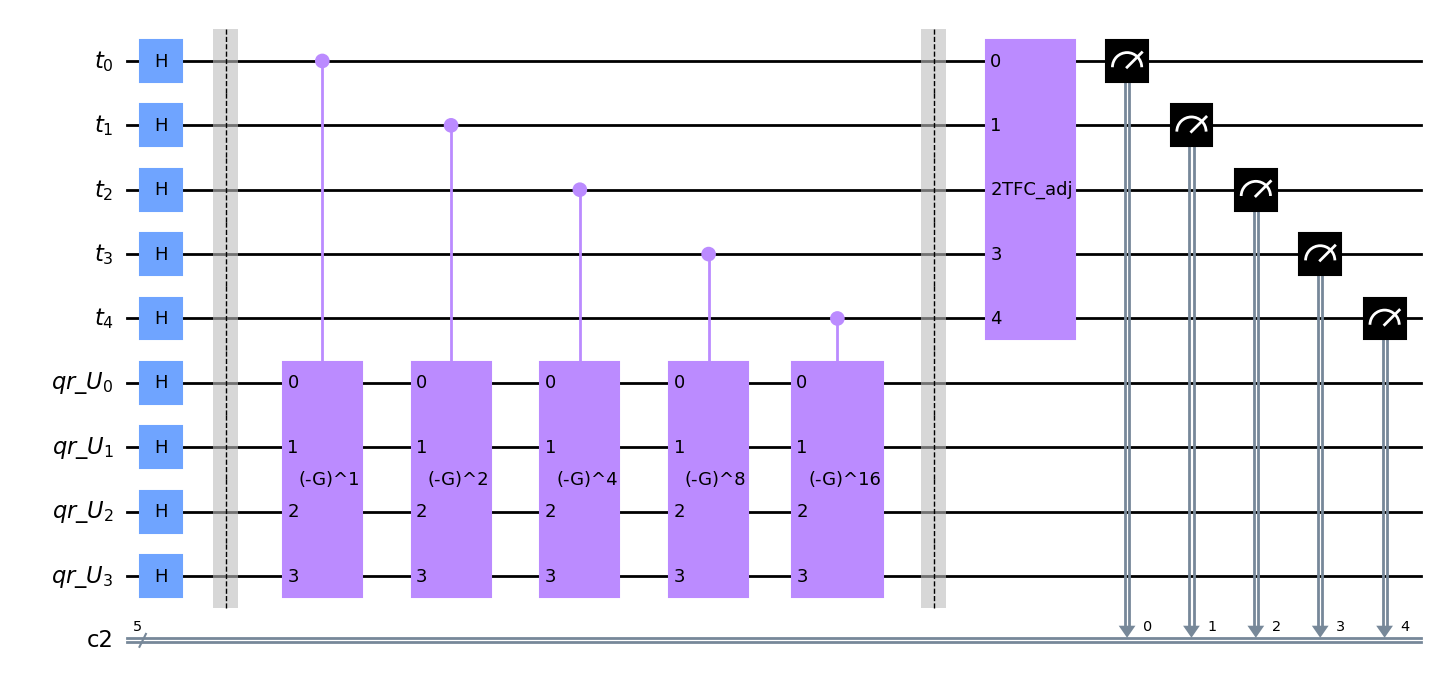

In [19]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 5 # la dimensión del registro de evaluación 
n = 4 

qrt=QuantumRegister(t,name="t")
qra=QuantumRegister(n,name="qr_U") # aquí 1 es la dimensión del espacio en el que opera U
crt=ClassicalRegister(t)
qpe = QuantumCircuit(qrt,qra,crt)   

qpe.h(range(t+n))
qpe.barrier()

# aplicamos los operadores controlados c((-G)^(2^j))
for j in range(t):
    qpe.append(c_G(n,w_array,2**j),[qrt[j]]+qra[:])
    
qpe.barrier()

# aplicamos la QFT^-1 que está definida en macro.py 
qpe.append(TFC_adj(t),qrt)

qpe.measure(qrt,crt)

qpe.draw(output="mpl")

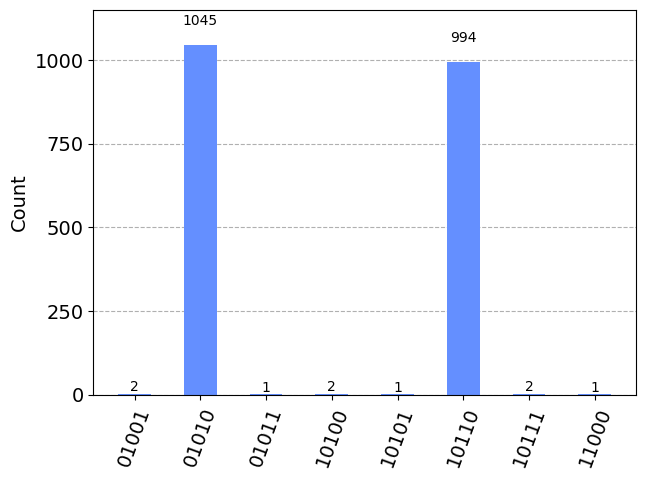

In [20]:
from qiskit import Aer, execute
M_backend = Aer.get_backend('qasm_simulator')

from qiskit.visualization import plot_histogram
results = execute(qpe, M_backend, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)

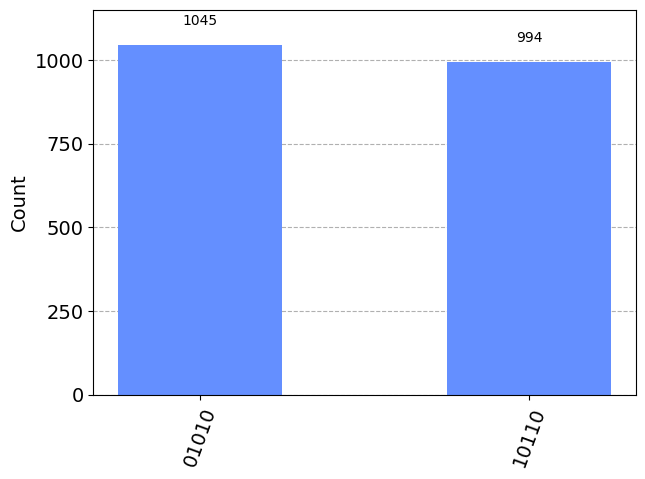

In [21]:
majority_counts = {k: v for k, v in counts.items() if  v>300 }
#print(projected_counts)
plot_histogram(majority_counts)

In [22]:
# la lista de m_i
mi_list = sorted([int(keys,2) for  keys in majority_counts]) 
print('{m_i} ~ ', mi_list)

# la lista de a_i
ai_list = [m/2**t for m in mi_list]

# la lista de M_i
Mi_list = [2**n*np.cos(np.pi*a)**2 for a in ai_list]
print('M_i=', Mi_list)

# redondeo de M_i al entero más próximo
rounded_Mi_list = [round(Mi) for Mi in Mi_list]
print(' M_i =', rounded_Mi_list)


{m_i} ~  [10, 22]
M_i= [4.938532541079283, 4.938532541079277]
 M_i = [5, 5]


In [23]:
print('Number of solutions =', round(np.mean(rounded_Mi_list)))

Number of solutions = 5
